# Project: Wrangling and Analyze Data

In [1]:
# This cell to set up import statements for all of the packages that 
#   we will be to use.
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import os

% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Make directory if it doesn't already exist
folder_name = 'Udacity_Data_Anayltic_Project2'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Display the columns/features of the dataframe
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
 ##Let's create the Request to get the data from the libary  
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
#Let's access the content and write to a File
with open(os.path.join(folder_name, 
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
# Let's Read the file with pandas and print the frist 5 rows
image_predictions = pd.read_table(url, sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# We already let's Load the data from our libary

df_list = []
with open('tweet-json.txt','r') as tweet_df:
    for line in tweet_df:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        
    #Let's Append to a list of dictionaries
        df_list.append({'tweet_id' : tweet_id,
                        'retweet_count':retweet_count,
                        'favorite_count':favorite_count})
        tweet= pd.DataFrame(df_list, columns = ['tweet_id' , 'retweet_count', 'favorite_count'])

In [9]:
tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
 ##Asses archive data
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


We noticed that 50% of our `rating_numerator` are 11 and 75% are 12 this is not right since our `rating_denominator`
is 10

In [13]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1854,675534494439489536,NaN,NaN,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494...,11,10,a,None,None,None,None
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,None,None,None
1219,714631576617938945,NaN,NaN,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He's a feisty pup. Needs a b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714631576...,4,10,Benedict,None,None,None,None
1774,678023323247357953,6.780211e+17,4.196984e+09,2015-12-19 01:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After getting lost in Reese's eyes for several...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1990,672640509974827008,NaN,NaN,2015-12-04 04:56:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonidas. He just got rekt by a snowba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672640509...,9,10,Leonidas,None,None,None,None


In [14]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
#Let's Check for all the all the dog names with sting length less than 3
non_correct_names = twitter_archive.name.unique()

for i in non_correct_names:
    if len(i) < 3:
        print(i)

a
Mo
Bo
an
O
Al
my
by
Ed
JD
Jo


**twitter_archive**We noticed that we have `name` with strings less than 3 and also some are None 

In [16]:
#Lets print the row contqining the dog name O
twitter_archive.loc[twitter_archive['name'] == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [17]:
#Lets print the row contqining the dog name a
twitter_archive.loc[twitter_archive['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [18]:
#Lets print the row contqining the dog name my
twitter_archive.loc[twitter_archive['name'] == 'my']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None


> **Remark**:
We Notice that some wrong dog names `a,my,an` are all `lower cases` and are diffrent from the other names starting with an Upper case so let check for more `names with lower cases`

In [19]:
#let check for the names in lower case
names_lowercase = twitter_archive[twitter_archive['name'].str.islower()]['name'].to_list()

names_lowercase =list(set(names_lowercase))

names_lowercase

['actually',
 'his',
 'by',
 'one',
 'incredibly',
 'my',
 'old',
 'this',
 'unacceptable',
 'officially',
 'an',
 'getting',
 'a',
 'space',
 'all',
 'mad',
 'the',
 'just',
 'such',
 'life',
 'very',
 'light',
 'infuriating',
 'not',
 'quite']

In [20]:
##Lets print the row contqining the dog name incredibly
twitter_archive.loc[twitter_archive['name'] == 'incredibly']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None


> **Remark**:
Actually the list printed of `names in lower cases`  doesn't seem to be a list of names rather it's a list of 
words and this is propablean error gotten from the tool uesd to extract the names

In [21]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
sum(image_predictions.duplicated())

0

In [23]:
sum(image_predictions.jpg_url.duplicated())

66

We have duplicate image link in the `jpg_url column`

In [24]:
tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [25]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [26]:
sum(tweet.duplicated())

0

In [27]:
tweet.shape

(2354, 3)

### Quality issues

1.`twitter_archive`table: Also **Inaccurate data** can be seen in the `name	doggo	floofer	pupper	puppo` columns too because in this columns instead of having the *valid data* we instead have ~~None~~ Which is not correct

2.`twitter_archive`table: **Incorrect data type** for timestamp and tweet_id.

3.`Generally`table: **Incorrect data type**for tweet_id in `twitter_archive`,`image_predictions`,`tweet` data frame.

4.`image_predictions`table: **Duplicates** in the `jpg_url column`.

5.`twitter_archive`table: **Inaccurate data** the name of the dog in row 775 was not properly spelled `O malley` and not `O`.

6.`twitter_archive`table: **Incorrect data** the like the dog names in lower cases like  'such', 'a', 'quite', 'quite', 'not', 'one' are not actually dog names.

7.`image_predictions`table: **Inconsistent Naming** the dog name in the *p1 , p2 , p3 columns* don't follow a consistent format as some names start with lower and other with upper cases.

8.`twitter_archive` **Some numerators are greater than the denominators and viceversa** but we will clean this and make the rating on 10

### Tidiness issues
9.`twitter_archive`table: **Unclear data** the `source column` is *not clear* because this refrences the source of the  twitte and we need the device name and not a refrence

10.`Useless Data` **Retweets `RT` and replies`@`'**

### Other issues Specified in `the Assessing Data Note`
- .`twitter_archive`table: **Retweets `RT` and replies`@`'** are not needed `Tidiness issue`

- .`twitter_archive`table: **tweets beyond August 1st, 2017** are not needed `Tidiness issue`

- .`twitter_archive`table: **Some numerators are greater than the denominators and viceversa** `Quality issue` ** this is part of a [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) but we will clean this and make the rating on 10

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_clean = tweet.copy()

### Issue #1: Inaccurate data

#### Define
- We will replace the None in the Name and the doggo,floofer,pupper,puppo columns with NaN 

#### Code

In [29]:
# Let's Change all None to NaN
def change_to_nan(item):
    if item == 'None':
        item = np.NaN
    return item

twitter_archive_clean['name'] = [change_to_nan(item) for item in twitter_archive_clean['name']]

twitter_archive_clean['doggo'] = [change_to_nan(item) for item in twitter_archive_clean['doggo']]
twitter_archive_clean['floofer'] = [change_to_nan(item) for item in twitter_archive_clean['floofer']]
twitter_archive_clean['pupper'] = [change_to_nan(item) for item in twitter_archive_clean['pupper']]
twitter_archive_clean['puppo'] = [change_to_nan(item) for item in twitter_archive_clean['puppo']]

#### Test

In [30]:
#Let's Check by Printing 5 random samples
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
440,819924195358416896,NaN,NaN,2017-01-13 15:08:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819924195...,11,10,NaN,doggo,NaN,NaN,NaN
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,NaN,NaN,NaN,NaN
1475,693642232151285760,NaN,NaN,2016-01-31 03:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Freddery. He's a Westminster Toblerone. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693642232...,9,10,Freddery,NaN,NaN,NaN,NaN
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,NaN,NaN,NaN,NaN,NaN
1299,707738799544082433,NaN,NaN,2016-03-10 01:24:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",He's doing his best. 12/10 very impressive tha...,NaN,NaN,NaN,https://vine.co/v/hUvHKYrdb1d,12,10,NaN,NaN,NaN,NaN,NaN


### Issue #2 & #3 : Incorrect data type for timestamp and tweet_id

#### Define
- We will use `pd.to_` the to change the **data type of the timestamp**
- We will use `.astype(str)` the to change the data type of the **tweet_id in all the three dataframes to string.**

#### Code

In [31]:
#Lets Chage the timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)

In [32]:
#Lets Chage the tweet_id to string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [34]:
image_predictions_clean.tweet_id.dtype

dtype('O')

In [35]:
tweet_clean.tweet_id.dtype

dtype('O')

### Issue #4: Duplicates in the jpg_url columns

#### Define
- let's drop all the duplicates in the `jpg_url columns`

#### Code

In [36]:
#Check for duplicates again
sum(image_predictions.jpg_url.duplicated())

66

In [37]:
#Lets Drop the Duplicates
image_predictions = image_predictions.drop_duplicates(subset=['jpg_url'])

#### Test

In [38]:
#Let check for duplicates again
sum(image_predictions.jpg_url.duplicated())

0

### Issue #5:  Inaccurate data the name of the dog in row 775 was not properly spelled 'O' instead of 'O malley'

#### Define
- we need to replace the `O` in the name column with `O'malley`

#### Code

In [39]:
#Let's Split the name propely
new_name=twitter_archive_clean[twitter_archive_clean['name']=='O']['text'].str.split(' ').str[2].to_list()

In [40]:
twitter_archive_clean.name.replace({'O':new_name[-1][:-1]},inplace = True)

#### Test

In [41]:
#Lets Check if we replace the O in names with O'Malley
twitter_archive_clean.loc[twitter_archive['name'] == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O'Malley,NaN,NaN,NaN,NaN


### Issue #6:  Incorrect data  'non dog name'

#### Define
- Let's Print out all the non dog names
- Let's Convert them to nulls

#### Code

In [42]:
#Lets Check for'non dog name'
twitter_archive_clean[twitter_archive_clean.name.str.lower() == twitter_archive_clean.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [43]:
#Lets Convet them to null values
twitter_archive_clean['name'] = twitter_archive_clean['name'].apply(lambda x: x if str(x).lower() != x else np.NaN)

In [44]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

#### Test

In [45]:
#Check check for all null values in the `name` column
twitter_archive_clean.name.isnull().sum()

854

In [46]:
#Check lower case names
twitter_archive_clean[twitter_archive_clean.name.str.lower() == twitter_archive_clean.name].name.unique()

array([], dtype=object)

### Issue #7: Inconsistent Naming `image_predictions`table

#### Define
- we will solve this problem by Capitalizing the frist Letters in dog names in our **p1**,**p2**,**p3** columns using the `item.capitalize` function

- we will also replace all the '_' between dog names in our **p1**,**p2**,**p3** columns with spaces ' '

#### Code

In [47]:
#Lets Use the item.capitalize to capitalise the frist letter in each dog name
image_predictions_clean['p1'] = [item.capitalize() for item in image_predictions_clean['p1']]
image_predictions_clean['p2'] = [item.capitalize() for item in image_predictions_clean['p2']]
image_predictions_clean['p3'] = [item.capitalize() for item in image_predictions_clean['p3']]

#### Test

In [48]:
image_predictions_clean['p1'].sample(20)

57                     Chihuahua
167                      Doormat
1788              Border_terrier
1619              Cocker_spaniel
1340    Chesapeake_bay_retriever
1517                   Seat_belt
1375                   Seat_belt
303                  Hermit_crab
532     Chesapeake_bay_retriever
103                      Toyshop
697                    Chihuahua
1321            Golden_retriever
828                 Dining_table
300                  Hermit_crab
954                 Egyptian_cat
1007                      Borzoi
1254           Shetland_sheepdog
698                      Minibus
1742                     Samoyed
154     Chesapeake_bay_retriever
Name: p1, dtype: object

In [49]:
image_predictions_clean.head(420)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,Collie,0.992732,True,Borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False
418,674036086168010753,https://pbs.twimg.com/media/CVqoPslWEAEk7EC.jpg,1,Toy_poodle,0.685617,True,Miniature_poodle,0.151936,True,Maltese_dog,0.045531,True


In [50]:
#Lets use the .replace to replace the '_' with spaces
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

In [51]:
image_predictions_clean['p1'].sample(20)

1309                 French bulldog
723             Rhodesian ridgeback
1623             Labrador retriever
617              Christmas stocking
1022           Old english sheepdog
1162                    Maltese dog
1150                 English setter
839                         Hamster
1706                            Pug
972                    Space heater
793                Golden retriever
1305                       Bluetick
301                           Swing
905                     Tennis ball
446               African crocodile
298                         Samoyed
1654      Staffordshire bullterrier
1121    Soft-coated wheaten terrier
1689                German shepherd
931                        Pembroke
Name: p1, dtype: object

In [52]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [53]:
twitter_archive_clean.shape

(2356, 17)

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #8 :  `twitter_archive` **Some numerators are greater than the denominators and viceversa** 

#### Define
- Let's Check the unique `numerators` and `denominators`
- Let's converts this into a rating system wher we will divide the `numerators` by the `denominators`and rate as a fraction 
- Also let's extract some infromation about the rating pattern using `regex`

#### Code

In [55]:
#Let print all unique denominator
unique_denominator = list(twitter_archive_clean.rating_denominator.unique())
unique_denominator

[10, 0, 15, 70, 7, 11, 150, 170, 20, 50, 90, 80, 40, 130, 110, 16, 120, 2]

In [56]:
#Let print all unique rating_numerator
unique_numerator = list(twitter_archive_clean.rating_numerator.unique())
unique_numerator

[13,
 12,
 14,
 5,
 17,
 11,
 10,
 420,
 666,
 6,
 15,
 182,
 960,
 0,
 75,
 7,
 84,
 9,
 24,
 8,
 1,
 27,
 3,
 4,
 165,
 1776,
 204,
 50,
 99,
 80,
 45,
 60,
 44,
 143,
 121,
 20,
 26,
 2,
 144,
 88]

In [57]:
import re 

regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


twitter_archive_clean['pattern'] = twitter_archive_clean['text'].apply(get_pattern)
twitter_archive_clean['fraction'] = twitter_archive_clean['rating_numerator'].astype(str) + '/' + twitter_archive_clean['rating_denominator'].astype(str)
twitter_archive_clean[twitter_archive_clean['pattern'] != twitter_archive_clean['fraction']][['pattern', 'fraction']]

,pattern,fraction
45,13.5/10,5/10
313,960/00,960/0
340,9.75/10,75/10
387,007/10,7/10
695,9.75/10,75/10
763,11.27/10,27/10
1689,9.5/10,5/10
1712,11.26/10,26/10
2260,-5/10,5/10


#### Test

In [58]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction
747,779834332596887552,NaN,NaN,2016-09-25 00:06:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He really wants to kiss himself...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,NaN,NaN,NaN,NaN,11/10,11/10
1549,689255633275777024,NaN,NaN,2016-01-19 01:18:43+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ferg. He swallowed a chainsaw. 1 like ...,NaN,NaN,NaN,https://vine.co/v/iOL792n5hz2,10,10,Ferg,NaN,NaN,NaN,NaN,10/10,10/10
961,751132876104687617,NaN,NaN,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,NaN,NaN,NaN,puppo,10/10,10/10
2132,670079681849372674,NaN,NaN,2015-11-27 03:20:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fabio. He's a wonderful pup. Can't stay a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670079681...,10,10,Fabio,NaN,NaN,NaN,NaN,10/10,10/10
1559,688547210804498433,NaN,NaN,2016-01-17 02:23:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,NaN,NaN,NaN,NaN,9/10,9/10
1010,747461612269887489,NaN,NaN,2016-06-27 16:08:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen a shark hold another shark like thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747461612...,10,10,NaN,NaN,NaN,NaN,NaN,10/10,10/10
802,772193107915964416,NaN,NaN,2016-09-03 22:02:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Willem. He's a Penn State pupper. Thin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772193107...,12,10,Willem,NaN,NaN,pupper,NaN,12/10,12/10
653,792050063153438720,NaN,NaN,2016-10-28 17:07:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Remus. He's a mop that came to life. C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792050063...,11,10,Remus,NaN,NaN,NaN,NaN,11/10,11/10
2224,668291999406125056,NaN,NaN,2015-11-22 04:56:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668291999...,10,10,NaN,NaN,NaN,NaN,NaN,10/10,10/10
1688,681523177663676416,NaN,NaN,2015-12-28 17:12:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,NaN,NaN,NaN,NaN,12/10,12/10


In [59]:
twitter_archive_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Tidiness

#### Code

### Issue #10: Unclear data source

#### Define
- Frist we will print the counts of all source
- We will split the source to get where the tweets are coming from

#### Code

In [60]:
# Let's Print the source counts
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [61]:
#Lets Split the data to get the tweet source only and not the url
twitter_archive_clean.source= twitter_archive_clean.source.str.split('>', expand= True)[1].str.split('</', expand= True)[0]

In [62]:
twitter_archive_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

#### Test

In [63]:
# Let's Print the source counts
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

And we have splitted Successuflly 

### Issue #11: Useless data

#### Define
- Frist we will display some `replies (@)` & `Retweets (RT)` 
- Then we will drop them
- the we will delete rows of text with `replies (@)` & `Retweets (RT)`

#### Code

In [64]:
# Let's display some replies (@) & Retweets (RT)
twitter_archive_clean[twitter_archive_clean.text.str.contains('RT') & twitter_archive_clean.text.str.contains('@')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN,NaN,13/10,13/10
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN,12/10,12/10
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,NaN,NaN,NaN,13/10,13/10
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN,14/10,14/10
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN,13/10,13/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,Twitter for iPhone,RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,NaN,NaN,NaN,NaN,10/10,10/10
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16+00:00,Twitter for iPhone,RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,NaN,NaN,NaN,NaN,10/10,10/10
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,Twitter for iPhone,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,NaN,NaN,NaN,NaN,NaN,12/10,12/10
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,NaN,NaN,NaN,NaN,NaN,12/10,12/10


In [65]:
#Lets check for rows in 'in_reply_to_status_id' with no NaN values
replies = (~twitter_archive_clean.in_reply_to_status_id.isnull())
# Let Print the Sum
replies.sum()

78

In [66]:
# Lets remove them from twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[~replies]

In [67]:
#Lets check for rows in 'retweeted_status_id' with no NaN values
retweets = (~twitter_archive_clean.retweeted_status_id.isnull())
# Let Print the Sum
retweets.sum()

181

In [68]:
# Lets remove them from twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[~retweets]

In [69]:
# Lets check if we rwmoved all those values
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [70]:
#We create a Varriable called 'useless_data'
useless_data = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp']
#Here we drop the useless_data Varriable
twitter_archive_clean.drop(useless_data, axis=1, inplace=True)

In [71]:
#Let check if we drop the columns in the 'useless_data' variable
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'pattern', 'fraction'],
      dtype='object')

#### Test

In [72]:
#Here we check if we droped all the 'replies (@)' ' & Retweets (RT)'
twitter_archive_clean[twitter_archive_clean.text.str.contains('RT') & twitter_archive_clean.text.str.contains('@')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction


In [73]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,13/10,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,13/10,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,12/10,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,13/10,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,12/10,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN,5/10,5/10
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN,6/10,6/10
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN,9/10,9/10
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN,7/10,7/10


In [74]:
#Lets Check
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1390 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
 12  pattern             2097 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

###  Let's Merge the three dataframes

In [75]:
#Let's Check the Shape of each data frame
twitter_archive_clean.shape, image_predictions_clean.shape, tweet_clean.shape

((2097, 14), (2075, 12), (2354, 3))

In [76]:
 twitter_archive_master = twitter_archive_clean.merge(tweet_clean,on='tweet_id').merge(image_predictions_clean,on='tweet_id')

In [77]:
#Let's Check the Shape of the _master data frame
twitter_archive_master.shape

(1971, 27)

### Export the dataframe to a csv
- We  will do this using the `pd.to_csv()`

In [78]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [79]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [80]:
twitter_archive_master.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
210,839990271299457024,2017-03-10 00:04:21+00:00,Twitter for iPhone,Meet Sojourner. His nose is a Fibonacci Spiral...,https://twitter.com/dog_rates/status/839990271...,13,10,Sojourner,NaN,NaN,...,2,Staffordshire bullterrier,0.604938,True,American staffordshire terrier,0.311540,True,Boston bull,0.037159,True
513,783839966405230592,2016-10-06 01:23:05+00:00,Twitter for iPhone,This is Riley. His owner put a donut pillow ar...,https://twitter.com/dog_rates/status/783839966...,13,10,Riley,NaN,NaN,...,1,Quilt,0.333739,False,Siamese cat,0.136245,False,Three-toed sloth,0.117464,False
630,762035686371364864,2016-08-06 21:20:40+00:00,Twitter for iPhone,This left me speechless. 14/10 heckin heroic a...,https://twitter.com/dog_rates/status/762035686...,14,10,NaN,NaN,NaN,...,1,Home theater,0.063152,False,Cash machine,0.046692,False,Theater curtain,0.046277,False
1685,671159727754231808,2015-11-30 02:52:03+00:00,Twitter for iPhone,This is Anthony. He just finished up his maste...,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,NaN,NaN,...,1,Pitcher,0.117446,False,Sunglasses,0.062487,False,Mask,0.059517,False
1331,681891461017812993,2015-12-29 17:36:07+00:00,Twitter for iPhone,Say hello to Charlie. He's scholarly af. Quite...,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,NaN,NaN,...,1,Chihuahua,0.203570,True,Doormat,0.134316,False,Toy terrier,0.084482,True
1471,676101918813499392,2015-12-13 18:10:33+00:00,Twitter for iPhone,Meet Striker. He's ready for Christmas. 11/10 ...,https://twitter.com/dog_rates/status/676101918...,11,10,Striker,NaN,NaN,...,1,Shih-tzu,0.225848,True,Norfolk terrier,0.186873,True,Irish terrier,0.106987,True
1584,673363615379013632,2015-12-06 04:49:31+00:00,Twitter for iPhone,This little pupper can't wait for Christmas. H...,https://twitter.com/dog_rates/status/673363615...,11,10,NaN,NaN,NaN,...,1,Ox,0.193431,False,Warthog,0.123827,False,Bison,0.111177,False
665,757596066325864448,2016-07-25 15:19:12+00:00,Twitter for iPhone,Here's another picture without a dog in it. Id...,https://twitter.com/dog_rates/status/757596066...,4,10,NaN,NaN,NaN,...,1,Doormat,0.845256,False,Wallet,0.095718,False,Wool,0.026072,False
452,793962221541933056,2016-11-02 23:45:19+00:00,Twitter for iPhone,This is Maximus. His face is stuck like that. ...,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,NaN,NaN,...,1,Labrador retriever,0.861651,True,Golden retriever,0.044462,True,Staffordshire bullterrier,0.016497,True
729,749036806121881602,2016-07-02 00:27:45+00:00,Twitter for iPhone,This is Dietrich. He hops at random. Other dog...,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,NaN,NaN,...,1,Sulphur-crested cockatoo,0.960276,False,West highland white terrier,0.019522,True,Samoyed,0.006396,True


In [81]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1349 non-null   object 
 8   doggo               73 non-null     object 
 9   floofer             8 non-null      object 
 10  pupper              209 non-null    object 
 11  puppo               23 non-null     object 
 12  pattern             1971 non-null   object 
 13  fraction            1971 non-null   object 
 14  retweet_count       1971 non-null   int64  
 15  favorite_count      1971 non-null   int64  
 16  jpg_ur

### Insights:

1. We also Noticed that most of the tweets where from Iphone's and we had less tweets from other sources

2. Let's check to see what is the Most popular dog name

3. What is the most common dog stage?

4. Let check the relationship between retweets and favourite count

### Visualization

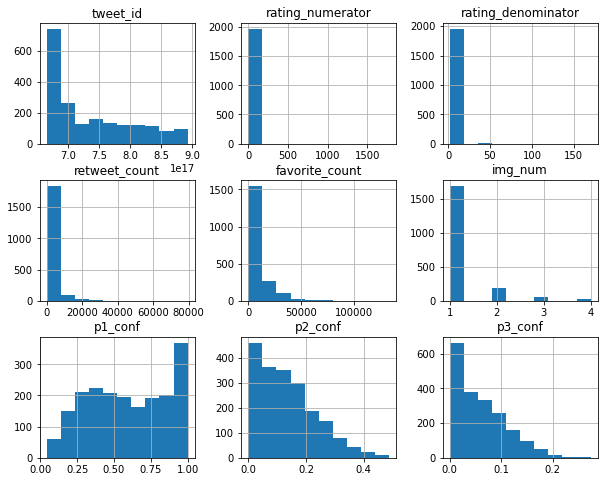

In [82]:
#Lets's plot the entire data frame
twitter_archive_master.hist(figsize=(10,8));

1. We also Noticed that most of the tweets where from Iphone's and we had less tweets from other sources

<AxesSubplot:xlabel='source', ylabel='count'>

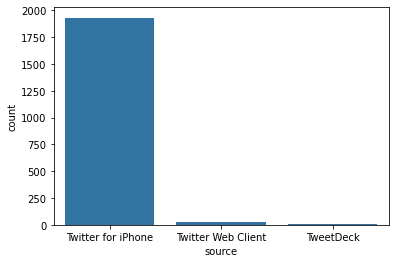

In [83]:
#1 Here We plot to see visual the source of our data
# Make figure and axes
#colors = ['steelblue', 'silver', 'gray']
base_color = sb.color_palette()[0]
sb.countplot(data = twitter_archive_master, x = 'source', color = base_color)

In [84]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

2. Let's check to see what is the Most popular dog name

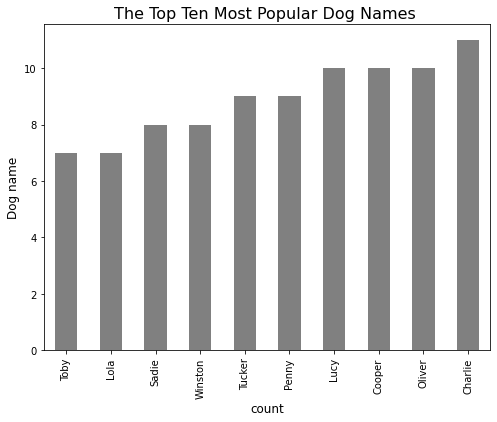

In [85]:
#Let's plot the popular dog name
plt.figure(figsize=(8,6))
twitter_archive_master['name'].value_counts()[0:10].sort_values(ascending=True).plot(kind='bar' , color ='gray')

# Set x_label, y_label and title:
plt.xlabel('count',size=12)
plt.ylabel('Dog name', size= 12)
plt.title('The Top Ten Most Popular Dog Names ', size= 16);

3. What is the most common dog stage?

In [86]:
# Let's Consolidate this data and create a new column 'dog_stage'
twitter_archive_master['dog_stage'] = twitter_archive_master.doggo.fillna(twitter_archive_master.floofer.fillna(twitter_archive_master.pupper.fillna(twitter_archive_master.puppo)))

In [87]:

twitter_archive_master.shape

(1971, 28)

In [88]:
# Let's drop these column
twitter_archive_master.drop(['doggo',
                             'floofer',
                             'pupper', 
                             'puppo'], axis=1, inplace=True)

In [89]:
twitter_archive_master.shape

(1971, 24)

In [90]:
twitter_archive_master.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,pattern,fraction,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
188,845397057150107648,2017-03-24 22:08:59+00:00,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,13/10,13/10,...,Dandie dinmont,0.394404,True,Maltese dog,0.186537,True,West highland white terrier,0.181985,True,doggo
307,822859134160621569,2017-01-21 17:31:20+00:00,Twitter for iPhone,This is Hobbes. He was told he was going to th...,https://twitter.com/dog_rates/status/822859134...,12,10,Hobbes,12/10,12/10,...,Malinois,0.332897,True,Chihuahua,0.104116,True,Staffordshire bullterrier,0.047745,True,NaN


In [91]:
twitter_archive_master.dog_stage.value_counts()

pupper     201
doggo       73
puppo       22
floofer      7
Name: dog_stage, dtype: int64

In [92]:
twitter_archive_master.dog_stage.describe()

count        303
unique         4
top       pupper
freq         201
Name: dog_stage, dtype: object

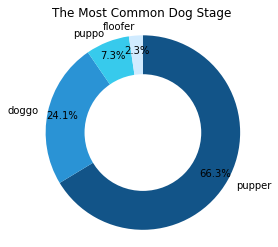

In [93]:
#Let Do a Dounts plot to show the percentage of each dog stages

#colors
colors = ['#125488','#2A93D5','#37CAEC','#D1EBFF']

#Top 5 dog stages
stages_pie = twitter_archive_master.dog_stage.value_counts()

plt.pie(stages_pie, colors = colors, labels=stages_pie.index, autopct='%1.1f%%', startangle=90,
        pctdistance=0.85,counterclock = False, labeldistance=1.1)
plt.axis('square');

#Draw circle
centre_circle = plt.Circle((0,0),0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Figure title
plt.title('The Most Common Dog Stage');
plt.show()

4. Let check the relationship between retweets and favourite count

Text(0, 0.5, 'favorite')

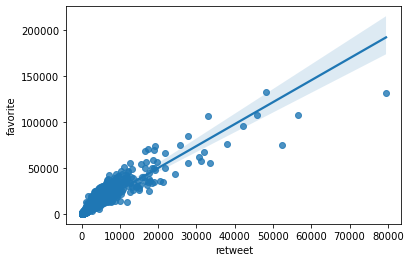

In [94]:
sb.regplot(data = twitter_archive_master, x = 'retweet_count', y = 'favorite_count');
plt.xlabel('retweet')
plt.ylabel('favorite')

> **Remark**:
We noticed that there is a `positive correlation`between retweet and favorite counts

In [95]:
# Show out top 5 most retweeted dog names in twitter archive master:
top_retweets = twitter_archive_master.groupby('name')['retweet_count'].mean()[0:5].sort_values(ascending=False)

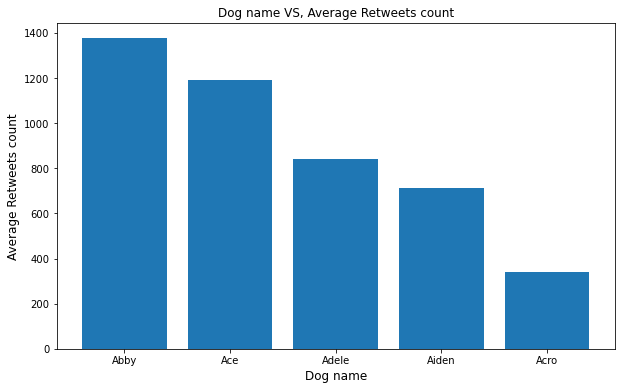

In [96]:
figure= plt.figure(figsize=(10,6))

plt.bar(top_retweets.index, top_retweets.values)
plt.xlabel('Dog name' , size= 12)
plt.ylabel('Average Retweets count' , size= 12)
plt.title('Dog name VS, Average Retweets count');

>The Dogg with the most  Average Retweets count retweeted Dog was `Abby`